### Testing out the new project

In [2]:
import sys
import os

sys.path.append(os.path.abspath(".."))

import pandas as pd

from src.clean import detect_na, standardize_columns, impute_nas
from src.eda import extended_describe, plot_correlation_heatmap, plot_dists, calc_vif
from src.train import train_model
from src.tune import grid_search
from src.eval import eval_classification
from src.predict import load_trained_model, make_preds

df = pd.read_csv('../data/Breast_Cancer.csv')

df

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive


### Cleaning and Preprocessing

In [3]:
detect_na(df)

,Columns,NA_count
0,Age,0
1,Race,0
2,Marital Status,0
3,T Stage,0
4,N Stage,0
5,6th Stage,0
6,differentiate,0
7,Grade,0
8,A Stage,0
9,Tumor Size,0


### EDA

In [4]:
# This will kick off a much larger discussion about that OHE (One Hot Encoding) and the drop_first=True argument
# It's undeniable that some information will be lost, but it can be re-created, no? 
# Yes, they can! It's tedious, but it can be done... then what's the harm? 
# Well, when there's hundreds or thousands of features, categorical reconstruction doesn't feel as feasible! 
# Exploring this concept more in a blog post; for now we'll just use get_dummies as usual

df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months,Race_Other,Race_White,Marital Status_Married,Marital Status_Separated,Marital Status_Single,...,differentiate_Poorly differentiated,differentiate_Undifferentiated,differentiate_Well differentiated,Grade_1,Grade_2,Grade_3,A Stage_Regional,Estrogen Status_Positive,Progesterone Status_Positive,Status_Dead
0,68,4,24,1,60,False,True,True,False,False,...,True,False,False,False,False,True,True,True,True,False
1,50,35,14,5,62,False,True,True,False,False,...,False,False,False,False,True,False,True,True,True,False
2,58,63,14,7,75,False,True,False,False,False,...,False,False,False,False,True,False,True,True,True,False
3,58,18,2,1,84,False,True,True,False,False,...,True,False,False,False,False,True,True,True,True,False
4,47,41,3,1,50,False,True,True,False,False,...,True,False,False,False,False,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,9,1,1,49,True,False,True,False,False,...,False,False,False,False,True,False,True,True,True,False
4020,56,46,14,8,69,False,True,False,False,False,...,False,False,False,False,True,False,True,True,True,False
4021,68,22,11,3,69,False,True,True,False,False,...,False,False,False,False,True,False,True,True,False,False
4022,58,44,11,1,72,False,False,False,False,False,...,False,False,False,False,True,False,True,True,True,False


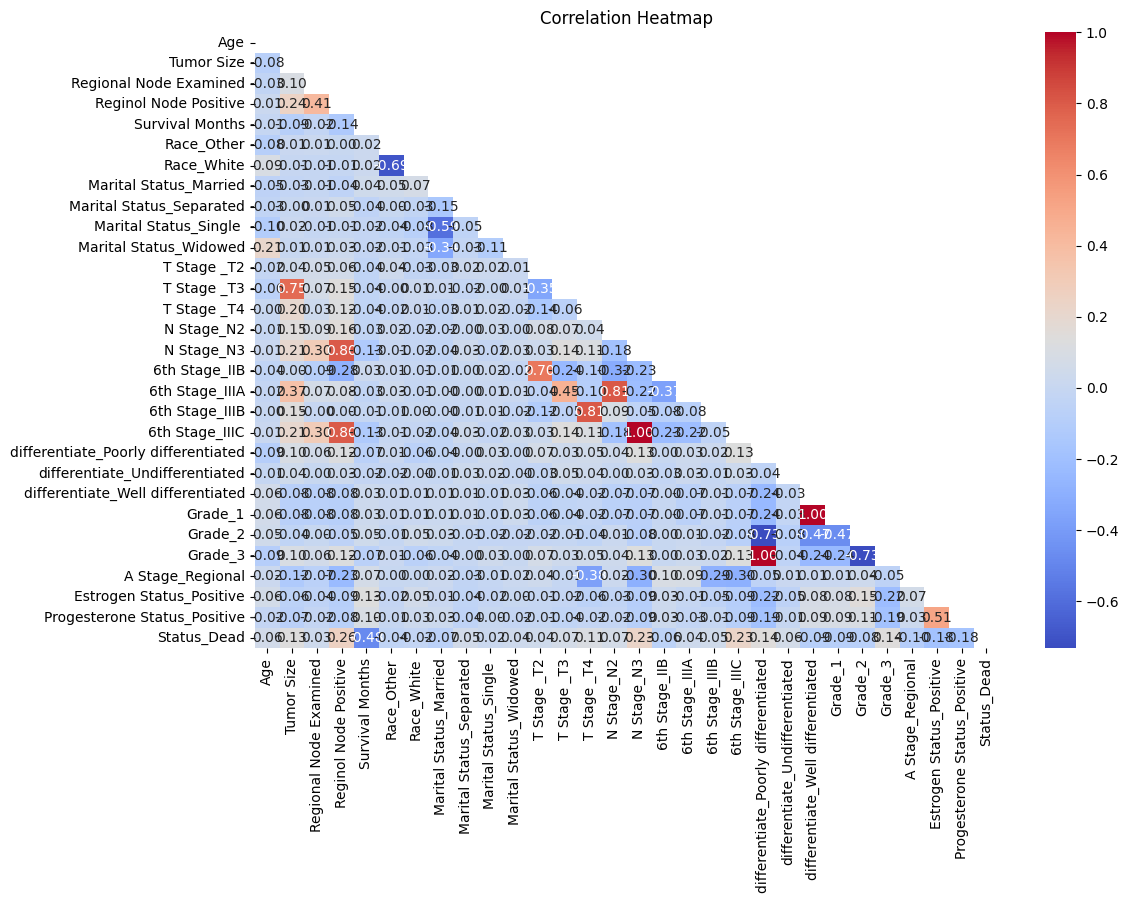

In [5]:
plot_correlation_heatmap(df_encoded)

In [6]:
summary_stats = extended_describe(df) 
summary_stats

,count,mean,std,min,25%,50%,75%,max,skewness,kurtosis
Age,4024.0,53.972167,8.963134,30.0,47.0,54.0,61.0,69.0,-0.220373,-0.755088
Tumor Size,4024.0,30.473658,21.119696,1.0,16.0,25.0,38.0,140.0,1.739750,3.634207
Regional Node Examined,4024.0,14.357107,8.099675,1.0,9.0,14.0,19.0,61.0,0.829274,1.649322
Reginol Node Positive,4024.0,4.158052,5.109331,1.0,1.0,2.0,5.0,46.0,2.702536,8.981266
Survival Months,4024.0,71.297962,22.921430,1.0,56.0,73.0,90.0,107.0,-0.589998,0.019977
